<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-DGarcia-A01086411/blob/main/Semana_7_Data_Analysis_with_Python_Modulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#David Eduardo Garcia Reyes - A01086411

##Actividad Semana 7 - Data Analysis with Python
##Modulo 4

#**Teoria**
#Regresion lineal Simple y Multiple
#Evaluacion del modelo usando visualizacion
#Regresion polinomial y Pipelines
#R^2 y MSE para evaluacion In-Sample
#Prediccion y toma de decisiones

#Evidencia Graded Review Questions - Modulo 4
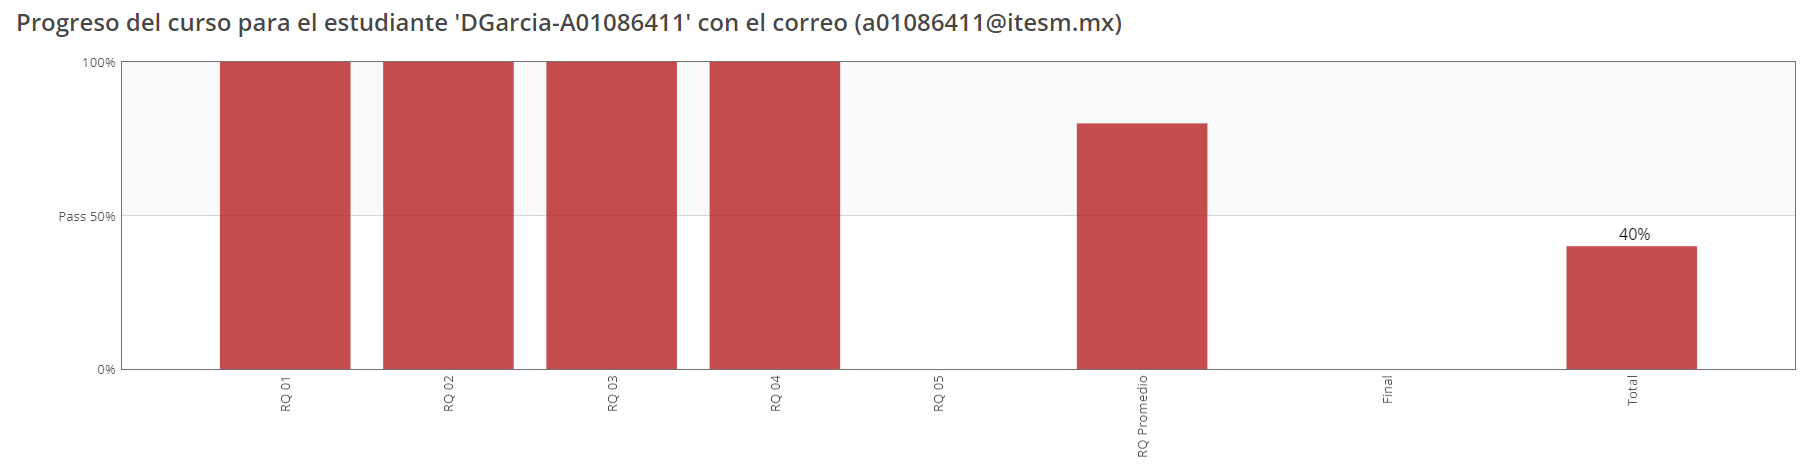

In [1]:
#Model Development

In [2]:
#Importar las librerias necesarias para el laboratorio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Definir link para archvio de base de datos de descarga y cargar dataframe
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
#1. Linear Regression and Multiple Linear Regression

In [6]:
#Importar modulos para regresion linear
from sklearn.linear_model import LinearRegression

In [7]:
#Crear objeto de regresion linear
lm = LinearRegression()
lm

LinearRegression()

In [8]:
#Utilizar highway-mpg para ver si nos ayuda a predecir el precio
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [9]:
#Mostrar una prediccion
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
#Valor intercept a
lm.intercept_

38423.3058581574

In [11]:
#Valor slope b
lm.coef_

array([-821.73337832])

In [12]:
#Crear objeto de regresion linear llamado lm1
lm1 = LinearRegression()
lm1

LinearRegression()

In [13]:
#Utilizar engine-size para ver si nos ayuda a predecir el precio
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [14]:
#Valor intercept a
lm1.intercept_

array([-7963.33890628])

In [15]:
#Valor slope b
lm1.coef_

array([[166.86001569]])

In [16]:
#Ecuacion de la prediccion
Yhat = -7963.34 + 166.86 * X
Price = -7963.34 + 166.86 * df['engine-size']

In [17]:
#Multiple linear regression

In [19]:
#Desarrollar un modelo de prediccion usando variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [20]:
#Valor intercept
lm.intercept_

-15806.62462632922

In [21]:
#Valores de los coeficientes
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [23]:
#Ecuacion propuesta
#Price = -15806.62462632922 + 53.49574423 x horsepower + 4.70770099 x curb-weight + 81.53026382 x engine-size + 36.05748882 x highway-mpg

In [24]:
#Entrenar modelo de regresion multiple usando las variables "normalized-losses" y "highway-mpg"
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [25]:
#Valor intercept
lm2.intercept_

38201.31327245728

In [26]:
#Valores de los coeficientes
lm2.coef_

array([   1.49789586, -820.45434016])

In [27]:
#2. Model Evaluation Using Visualization

In [28]:
#Importar librerias necesarias
import seaborn as sns
%matplotlib inline 

In [29]:
#Regression Plot

(0.0, 48168.21836688707)

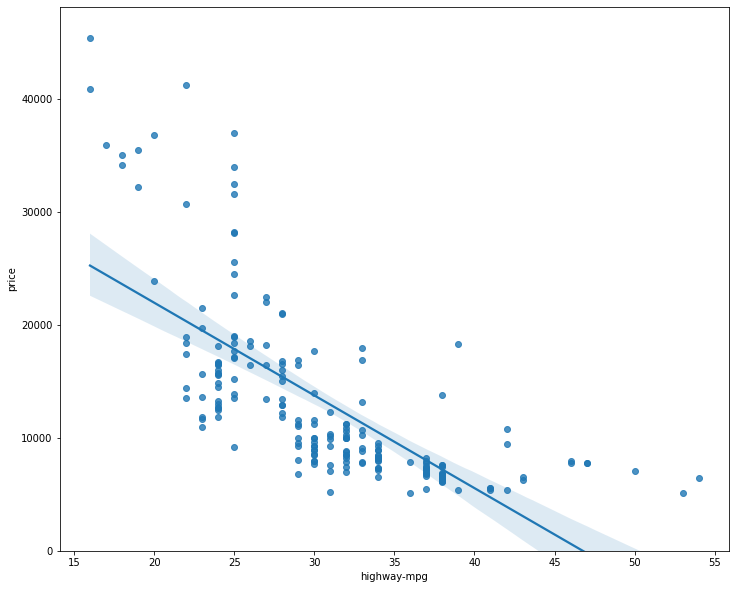

In [30]:
#Visualizar "highway-mpg" como variable potencial
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

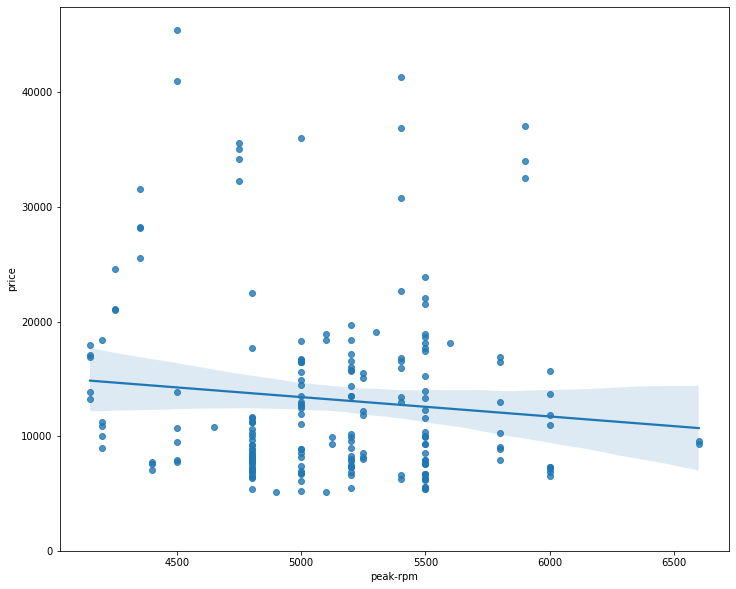

In [31]:
#Visualizar "peak-rpm" como variable potencial
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [32]:
#Identificar la correlacion de ambas variables
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [33]:
#Existe una correlacion mas fuerte de "highway-mpg" con "price" de -0.704692 que "peak-rpm" con solo -0.101616

In [34]:
#Residual plot

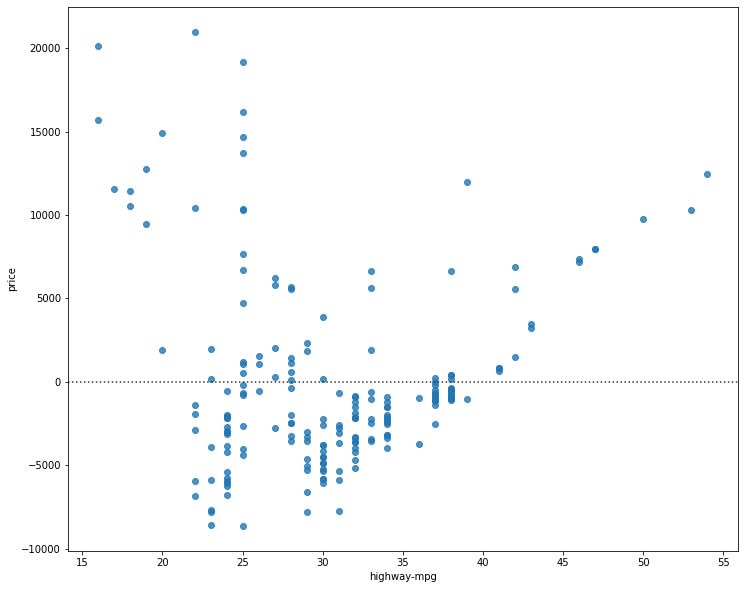

In [35]:
#Residual plot de "hightway-mpg"
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [37]:
#Multiple linear regression
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


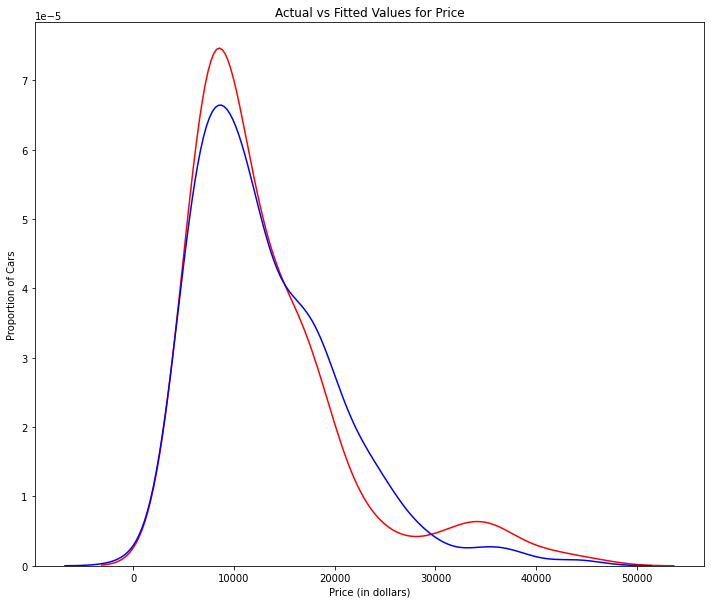

In [38]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [39]:
#3. Polynomial regression and Pipelines

In [41]:
#Para "highway-mpg" se usa mejor un modelo polinomial para ver si encaja mejor
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [42]:
x = df['highway-mpg']
y = df['price']

In [43]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


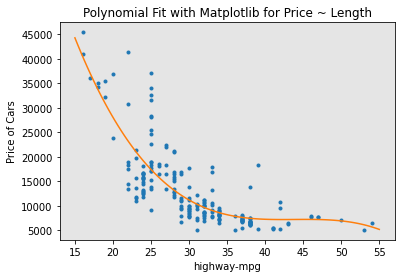

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [44]:
PlotPolly(p, x, y, 'highway-mpg')
np.polyfit(x, y, 3)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


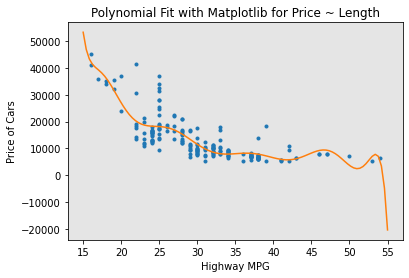

In [45]:
#Crear un modelo polinomial de orden 11
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [46]:
#Importar modulos requeridos
from sklearn.preprocessing import PolynomialFeatures

In [47]:
#Crear caracteristicas polinomiales de grado 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [48]:
Z_pr=pr.fit_transform(Z)

In [49]:
Z.shape

(201, 4)

In [50]:
Z_pr.shape

(201, 15)

In [51]:
#Pipeline

In [52]:
#Importar librerias necesarias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
#Crear un pipelines usando tuples
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [54]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [55]:
#Convertir datos a tipo float
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [56]:
#Normalizar informacion
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [57]:
#Crear pipeline
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [58]:
#4.Measures for In-Sample Evaluation

In [59]:
#Model 1 Simple linear regression

In [60]:
#Calcular R^2, highway_mpg_fit
lm.fit(X, Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [61]:
#Calcular MSE
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


In [64]:
#Model 2 Multiple linear regression

In [65]:
#Calcular R^2
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [71]:
#Calcular MSE
Y_predict_multifit = lm.predict(Z)
print(Y_predict_multifit)

[13699.11161184 13699.11161184 19051.65470233 10620.36193015
 15521.31420211 13869.66673213 15456.16196732 15974.00907672
 17612.35917161 10722.32509097 10722.32509097 17804.80307397
 18063.72662867 19320.78745066 26968.56492801 27674.72007721
 28191.0677239    650.62317688  5648.50489642  5813.27443123
  5478.81383232  5370.64136587  8739.61952024  5799.04215638
  5902.61157827  5902.61157827  9036.2046829  11863.43973759
 18767.70667001  4808.3090102   5693.32889063  4006.47212651
  6118.73075572  6194.05397163  6448.26982534  6514.17763926
  9478.65495235  9728.16310506  9798.77861998 10118.90228761
 11178.86719942 10423.81935057  9463.46710755 12626.61544369
 34470.03895495 34470.03895495 43996.52260522  5265.67702191
  5565.15645357  5588.69495854  5777.00299832  5800.5415033
  7337.21461795  7337.21461795  7360.75312292 10536.2966792
 11015.41658913 11133.109114   11015.41658913 11133.109114
 10579.12325046 11203.72462892 15570.21546943 13087.15905929
 23142.39640924 24248.706142

In [67]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


In [69]:
#Model 3: Polynomial Fit

In [70]:
#Importar librearias necesarias para calcular R^2
from sklearn.metrics import r2_score

In [72]:
#Calcular R^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [73]:
#Calcular MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

In [74]:
#5. Prediction and decision making

In [75]:
#Importar librerias necesarias
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [76]:
#Crear new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [77]:
lm.fit(X, Y)
lm

LinearRegression()

In [78]:
#Crear prediccion
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

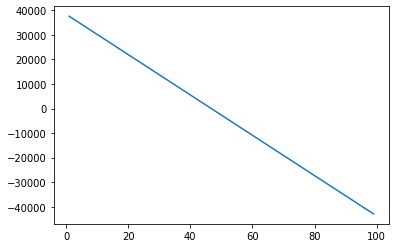

In [79]:
#Graficar datos
plt.plot(new_input, yhat)
plt.show()